In [1]:
#imports
import os
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import matplotlib 
matplotlib.rcParams['text.usetex']=True
import matplotlib.pyplot as plt
from sklearn.utils import resample
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

#newer imports
from random import random, seed
from sklearn.linear_model import SGDRegressor
from matplotlib import cm
import seaborn as sns

# Calculates R²-score
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

# Calculates mean squared error
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

## With optimal parameters ##

In [2]:
#imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets 

np.random.seed(3155)

b = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(b.data, b.target, test_size=0.2)
X_train_mean = np.mean(X_train, axis=0); # y_train_mean = np.mean(y_train, axis=0)
X_train -= X_train_mean; X_test -= X_train_mean;# y_train -= y_train_mean; y_test -= y_train_mean


#SGD

n_epochs = 100; M = 12; m = int(X_train.shape[0]/M); lmbd = 0.0004; gamma = 0.0 #1, 10 #90, 1  #eta = 1; lam = 0.0531 eta = 0.308; 
#eta = 1; lmbd = 0.0531; gamma = 0.0
eta = 0.8726
log_theta = np.random.randn(X_train.shape[1])
prev_grad = np.zeros(X_train.shape[1])

def sigmoid(x): 
        output = 1.0/(1.0+np.exp(-x))
        return output

#t0, t1 = 5, 50
#def learning_schedule(t):
#    return t0/(t+t1)

data_indices = np.arange(X_train.shape[0])

for epoch in range(n_epochs):
    for i in range(m): 
        
        #eta = learning_schedule(epoch*m+i)
        
        chosen_datapoints = np.random.choice(data_indices, size=M, replace=False)
        
        xi = X_train[chosen_datapoints]
        yi = y_train[chosen_datapoints]

        log_gradient =  -xi.T @ (yi - sigmoid(np.dot(xi,log_theta))) + 2*lmbd*log_theta
        #log_theta = log_theta - eta*log_gradient 
        log_theta = log_theta - (gamma*prev_grad + eta*log_gradient)
        prev_grad = gamma*prev_grad + eta*log_gradient

print('Logistic Regression'); print('--'*36)

log_predict_p = sigmoid(np.dot(X_test, log_theta)) 
log_predict_p = np.where(log_predict_p >= 0.5, 1, log_predict_p)
log_predict_p = np.where(log_predict_p < 0.5, 0, log_predict_p)

print('predicted outcome:'); print(log_predict_p); print()
print('MSE test: ', MSE(y_test, log_predict_p))
print('accuracy score: ', accuracy_score(y_test, log_predict_p))


#SciKit
print(); print()
print('Logistic Regression with SciKit'); print('--'*36)
logreg = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))
print("SciKit MSE Test: ", MSE(y_test, logreg.predict(X_test)))

Logistic Regression
------------------------------------------------------------------------
predicted outcome:
[0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.]

MSE test:  0.043859649122807015
accuracy score:  0.956140350877193


Logistic Regression with SciKit
------------------------------------------------------------------------
Test set accuracy with Logistic Regression: 0.95
SciKit MSE Test:  0.05263157894736842


C:\Users\Derya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### Accuracy Score vs Learning Rate ####

scores:
[0.965 0.939 0.947 0.912 0.939 0.947 0.939 0.93  0.711 0.921 0.868 0.939
 0.939 0.596 0.939 0.939 0.939 0.93  0.912 0.877]

max score achieved:  0.965
momentum term:  0.0


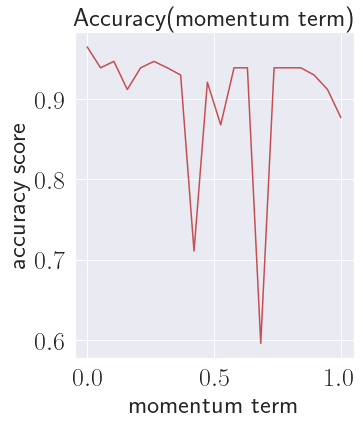

In [16]:
#SGD
np.random.seed(3155)
n_epochs = 100; M = 12; m = int(X_train.shape[0]/M); #lmbd = 0.1; gamma = 0.0
lmbd = 0.0004; gamma = 0.0

def sigmoid(x): 
        output = 1.0/(1.0+np.exp(-x))
        return output

#t0, t1 = 5, 50
#def learning_schedule(t):
#    return t0/(t+t1)

data_indices = np.arange(X_train.shape[0])

eta = 0.8726
gamma = np.around(np.linspace(0,1.0,20), 4)
scores = np.zeros(len(gamma))

for r in range(len(gamma)):
    
    log_theta = np.random.randn(X_train.shape[1])
    prev_grad = np.zeros(X_train.shape[1])
    
    for epoch in range(n_epochs):
        for i in range(m): 
        
            #eta = learning_schedule(epoch*m+i)
        
            chosen_datapoints = np.random.choice(data_indices, size=M, replace=False)
        
            xi = X_train[chosen_datapoints]
            yi = y_train[chosen_datapoints]

            log_gradient =  -xi.T @ (yi - sigmoid(np.dot(xi,log_theta))) + 2*lmbd*log_theta
            #log_theta = log_theta - eta[r]*log_gradient 
            log_theta = log_theta - (gamma[r]*prev_grad + eta*log_gradient)
            prev_grad = gamma[r]*prev_grad + eta*log_gradient
    
    log_predict_p = sigmoid(np.dot(X_test, log_theta)) 
    log_predict_p = np.where(log_predict_p >= 0.5, 1, log_predict_p)
    log_predict_p = np.where(log_predict_p < 0.5, 0, log_predict_p)
    
    scores[r] = np.around(accuracy_score(y_test, log_predict_p), 3)

print('scores:'); print(scores); print(); print('max score achieved: ', scores[np.argmax(scores)]); 
print('momentum term: ', gamma[np.argmax(scores)])

NORMAL = 26
fig, ax = plt.subplots(figsize = (5, 6))
plt.plot(gamma, scores, 'r-'); plt.xlabel('momentum term', fontsize=NORMAL); 
plt.ylabel('accuracy score', fontsize=NORMAL); plt.title('Accuracy(momentum term)', fontsize=NORMAL)
ax.tick_params(labelsize=NORMAL)
plt.savefig("log_momentum.pdf")
plt.show()

scores:
[0.93  0.939 0.904 0.939 0.93  0.939 0.939 0.93  0.93  0.93  0.93  0.947
 0.939 0.947 0.377 0.895 0.912 0.939 0.939 0.947]

max score achieved:  0.947
learning rate:  0.8726


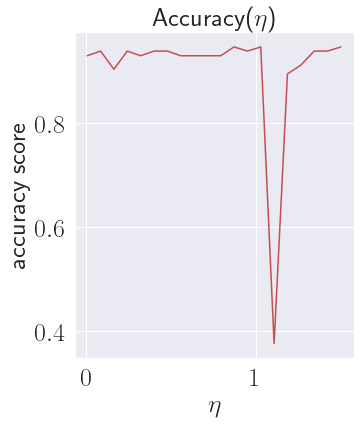

In [17]:
#SGD
np.random.seed(3155)
n_epochs = 100; M = 12; m = int(X_train.shape[0]/M); #lmbd = 0.1; gamma = 0.0
lmbd = 0.0004; gamma = 0.0

def sigmoid(x): 
        output = 1.0/(1.0+np.exp(-x))
        return output

#t0, t1 = 5, 50
#def learning_schedule(t):
#    return t0/(t+t1)

data_indices = np.arange(X_train.shape[0])

eta = np.linspace(0.01, 1.5, 20)
scores = np.zeros(len(eta))

for r in range(len(eta)):
    
    log_theta = np.random.randn(X_train.shape[1])
    prev_grad = np.zeros(X_train.shape[1])
    
    for epoch in range(n_epochs):
        for i in range(m): 
        
            #eta = learning_schedule(epoch*m+i)
        
            chosen_datapoints = np.random.choice(data_indices, size=M, replace=False)
        
            xi = X_train[chosen_datapoints]
            yi = y_train[chosen_datapoints]

            log_gradient =  -xi.T @ (yi - sigmoid(np.dot(xi,log_theta))) + 2*lmbd*log_theta
            #log_theta = log_theta - eta[r]*log_gradient 
            log_theta = log_theta - (gamma*prev_grad + eta[r]*log_gradient)
            prev_grad = gamma*prev_grad + eta[r]*log_gradient
    
    log_predict_p = sigmoid(np.dot(X_test, log_theta)) 
    log_predict_p = np.where(log_predict_p >= 0.5, 1, log_predict_p)
    log_predict_p = np.where(log_predict_p < 0.5, 0, log_predict_p)
    
    scores[r] = np.around(accuracy_score(y_test, log_predict_p), 3)

print('scores:'); print(scores); print(); print('max score achieved: ', scores[np.argmax(scores)]); 
print('learning rate: ', np.around(eta[np.argmax(scores)], 4))

NORMAL = 26
fig, ax = plt.subplots(figsize = (5, 6))
plt.plot(eta, scores, 'r-'); plt.xlabel('$\eta$', fontsize=NORMAL); plt.ylabel('accuracy score', fontsize=NORMAL); 
plt.title('Accuracy($\eta$)', fontsize=NORMAL)
ax.tick_params(labelsize=NORMAL)
plt.savefig("log_eta.pdf")
plt.show()

## Grid Search: epochs and mini-batches (1/2) ##

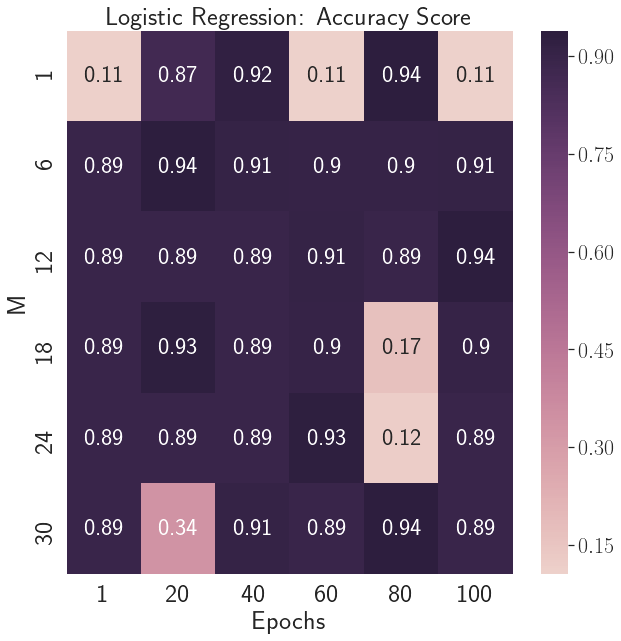

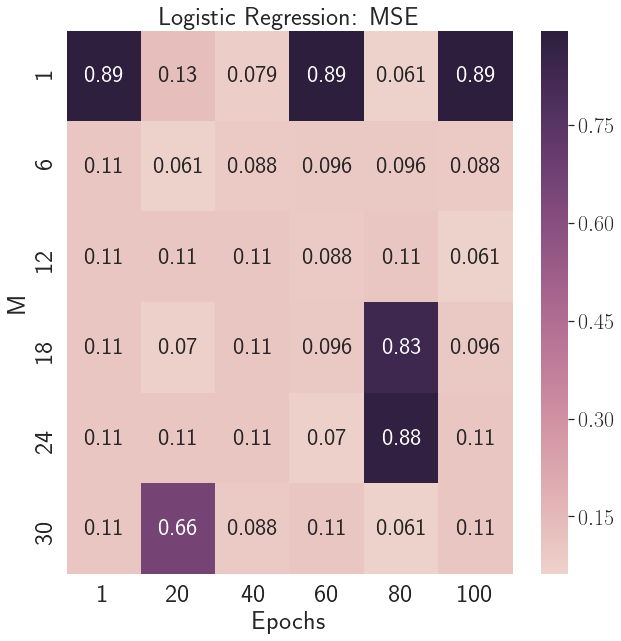

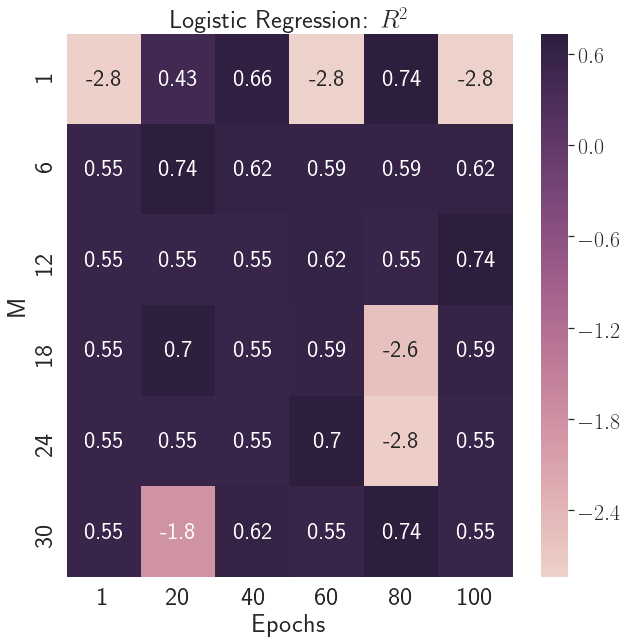

In [10]:
np.random.seed(3155)

b = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(b.data, b.target, test_size=0.2)
X_train_mean = np.mean(X_train, axis=0); # y_train_mean = np.mean(y_train, axis=0)
X_train -= X_train_mean; X_test -= X_train_mean;# y_train -= y_train_mean; y_test -= y_train_mean


#SGD

lmbd = 0.0531; gamma = 0.0
#lmbd = 0.0004; gamma = 0.0

def sigmoid(x): 
        output = 1.0/(1.0+np.exp(-x))
        return output

#t0, t1 = 5, 50
#def learning_schedule(t):
#    return t0/(t+t1)

data_indices = np.arange(X_train.shape[0])

M = np.linspace(1,30,6, dtype=int) #np.linspace(1,30,6, dtype=int) #5,30
n_epochs = np.linspace(1,100,6, dtype=int) #np.linspace(1,150,6, dtype=int) #10,150
accuracy_all = np.zeros((len(M), len(n_epochs)))
MSE_all = np.zeros((len(M), len(n_epochs)))
R2_all = np.zeros((len(M), len(n_epochs)))

#t0, t1 = 5, 50

#def learning_schedule(t):
#    return t0/(t+t1)

for i in range(len(M)):
    
    m = int(X_train.shape[0]/M[i])
    prev_grad = np.zeros(X_train.shape[1])
    log_theta = np.random.randn(X_train.shape[1])
      
    for j in range(len(n_epochs)):
        
        eta = 1
        
        for epoch in range(n_epochs[j]):
            for k in range(m): 

                #eta = learning_schedule(epoch*m+k)
                
                chosen_datapoints = np.random.choice(data_indices, size=M[i], replace=False)

                xi = X_train[chosen_datapoints]
                yi = y_train[chosen_datapoints]
        
                log_gradient =  -xi.T @ (yi - sigmoid(np.dot(xi,log_theta))) + 2*lmbd*log_theta
                log_theta = log_theta - (gamma*prev_grad + eta*log_gradient)
                prev_grad = gamma*prev_grad + eta*log_gradient
        
        log_predict_p = sigmoid(np.dot(X_test, log_theta)) 
        log_predict_p = np.where(log_predict_p >= 0.5, 1, log_predict_p)
        log_predict_p = np.where(log_predict_p < 0.5, 0, log_predict_p)
    
        accuracy_all[i][j] = accuracy_score(y_test, log_predict_p)
        MSE_all[i][j] = MSE(y_test, log_predict_p)
        R2_all[i][j] = R2(y_test, log_predict_p)
  

NORMAL = 26
sns.set(font_scale=2.0)

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy_all, annot=True, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels = n_epochs, yticklabels = M)
ax.set_title("Logistic Regression: Accuracy Score", fontsize=NORMAL)
ax.set_ylabel("M", fontsize=NORMAL)
ax.set_xlabel("Epochs", fontsize=NORMAL)
ax.tick_params(labelsize=NORMAL)
plt.savefig("log_accuracy_grid_minibatches_and_epochs.pdf")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(MSE_all, annot=True, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels = n_epochs, yticklabels = M)
ax.set_title("Logistic Regression: MSE", fontsize=NORMAL)
ax.set_ylabel("M", fontsize=NORMAL)
ax.set_xlabel("Epochs", fontsize=NORMAL)
ax.tick_params(labelsize=NORMAL)
plt.savefig("log_MSE_grid_minibatches_and_epochs.pdf")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(R2_all, annot=True, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels = n_epochs, yticklabels = M)
ax.set_title("Logistic Regression: $R^2$", fontsize=NORMAL)
ax.set_ylabel("M", fontsize=NORMAL)
ax.set_xlabel("Epochs", fontsize=NORMAL)
ax.tick_params(labelsize=NORMAL)
plt.savefig("log_r2_grid_minibatches_and_epochs.pdf")
plt.show()

## Grid Search: learning rate and $\lambda$ (2/2) ##

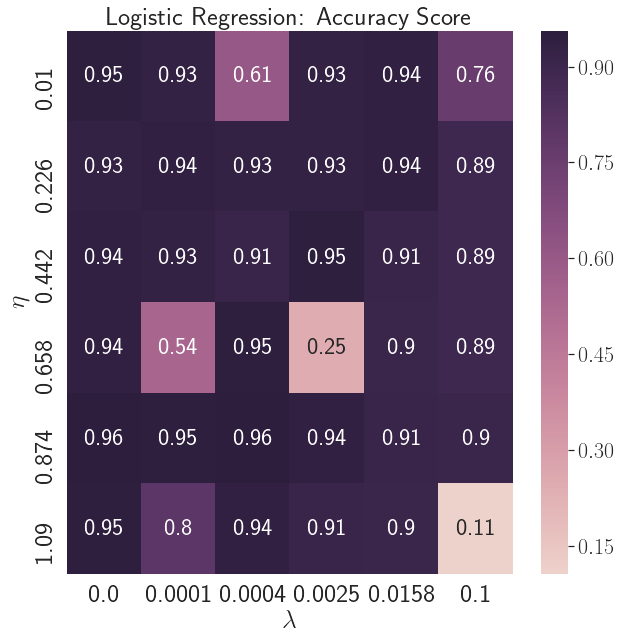

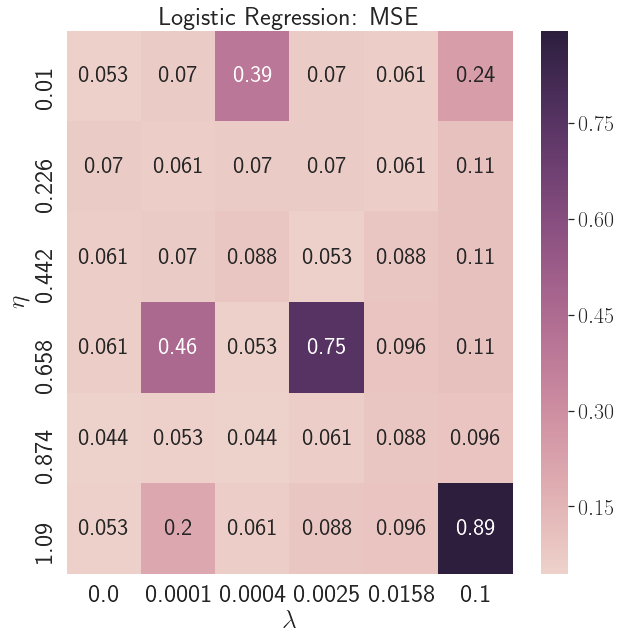

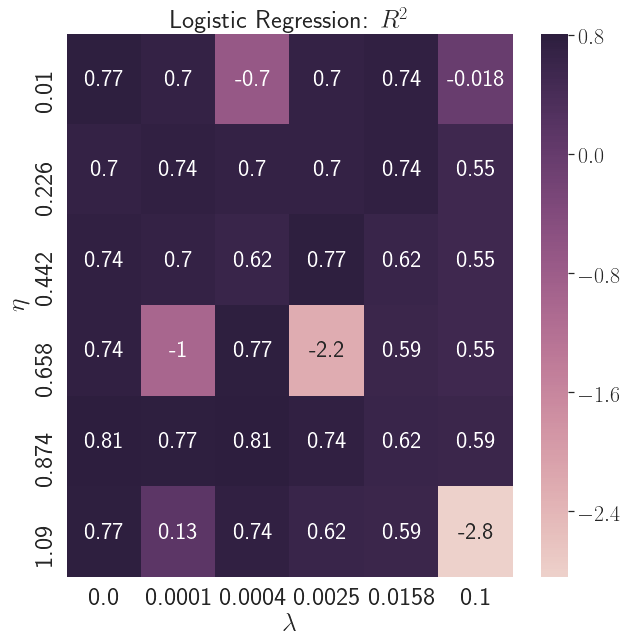

In [18]:
np.random.seed(3155)

b = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(b.data, b.target, test_size=0.2)
X_train_mean = np.mean(X_train, axis=0); # y_train_mean = np.mean(y_train, axis=0)
X_train -= X_train_mean; X_test -= X_train_mean;# y_train -= y_train_mean; y_test -= y_train_mean


#SGD

#M=10, epochs=90
gamma = 0.0; M = 6; n_epochs = 20; m = int(X_train.shape[0]/M) #M=1; epochs=90

def sigmoid(x): 
        output = 1.0/(1.0+np.exp(-x))
        return output

#t0, t1 = 5, 50
#def learning_schedule(t):
#    return t0/(t+t1)

data_indices = np.arange(X_train.shape[0])

eta = np.around(np.linspace(0.01, 1.09, 6), 4) #np.around(np.linspace(0.01, 1.5, 6), 4)
lmbd = np.around(np.logspace(-5,-1,6), 4)
accuracy_all = np.zeros((len(eta), len(lmbd)))
MSE_all = np.zeros((len(eta), len(lmbd)))
R2_all = np.zeros((len(eta), len(lmbd)))

#t0, t1 = 5, 50

#def learning_schedule(t):
#    return t0/(t+t1)

for i in range(len(eta)):
    
    prev_grad = np.zeros(X_train.shape[1])
    log_theta = np.random.randn(X_train.shape[1])
      
    for j in range(len(lmbd)):
        
        for epoch in range(n_epochs):
            for k in range(m): 

                #eta = learning_schedule(epoch*m+k)
                
                chosen_datapoints = np.random.choice(data_indices, size=M, replace=False)

                xi = X_train[chosen_datapoints]
                yi = y_train[chosen_datapoints]
        
                log_gradient =  -xi.T @ (yi - sigmoid(np.dot(xi,log_theta))) + 2*lmbd[j]*log_theta
                log_theta = log_theta - (gamma*prev_grad + eta[i]*log_gradient)
                prev_grad = gamma*prev_grad + eta[i]*log_gradient
        
        log_predict_p = sigmoid(np.dot(X_test, log_theta)) 
        log_predict_p = np.where(log_predict_p >= 0.5, 1, log_predict_p)
        log_predict_p = np.where(log_predict_p < 0.5, 0, log_predict_p)
    
        accuracy_all[i][j] = accuracy_score(y_test, log_predict_p)
        MSE_all[i][j] = MSE(y_test, log_predict_p)
        R2_all[i][j] = R2(y_test, log_predict_p)
  
NORMAL = 26
sns.set(font_scale=2.0)

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy_all, annot=True, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels = lmbd, yticklabels = eta)
ax.set_title("Logistic Regression: Accuracy Score", fontsize=NORMAL)
ax.set_ylabel("$\eta$", fontsize=NORMAL)
ax.set_xlabel("$\lambda$", fontsize=NORMAL)
ax.tick_params(labelsize=NORMAL)
plt.savefig("log_accuracy_grid_eta_and_lambda.pdf")
plt.show()
                   
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(MSE_all, annot=True, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels = lmbd, yticklabels = eta)
ax.set_title("Logistic Regression: MSE", fontsize=NORMAL)
ax.set_ylabel("$\eta$", fontsize=NORMAL)
ax.set_xlabel("$\lambda$", fontsize=NORMAL)
ax.tick_params(labelsize=NORMAL)
plt.savefig("log_mse_grid_eta_and_lambda.pdf")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(R2_all, annot=True, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels = lmbd, yticklabels = eta)
ax.set_title("Logistic Regression: $R^2$", fontsize=NORMAL)
ax.set_ylabel("$\eta$", fontsize=NORMAL)
ax.set_xlabel("$\lambda$", fontsize=NORMAL)
ax.tick_params(labelsize=NORMAL)
plt.savefig("log_r2_grid_eta_and_lambda.pdf")
plt.show()